In [31]:
# Imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
%matplotlib inline

In [32]:
# Load CSV
train_file_path = '../data/joe_filter_train_set.csv'
test_file_path = '../data/joe_filter_test_set.csv'

In [33]:
train_df = pd.read_csv(train_file_path)
train_df.head()

,Unnamed: 0,mean_Delta,mean_Theta,mean_Alpha,mean_Beta,mean_Gamma,mean_Slow,mean_Low_beta,mean_Relative_gamma,Fp1_Delta,...,O2_Low_beta,O2_Relative_gamma,alpha_frontal,alpha_temporal,alpha_asymmetry,beta_frontal,beta_temporal,beat_asymmetry,participant_id,label
0,0,-106.588969,-114.617508,-115.790711,-120.400378,-124.831465,-115.085881,-118.147766,0.921930,-107.168179,...,-118.741500,0.911965,0.001231,0.009129,0.010360,-0.000808,-0.000741,-0.001549,1,0
1,1,-101.926965,-109.419453,-109.978504,-118.724397,-122.435192,-109.944303,-114.976672,0.897980,-102.368628,...,-115.677659,0.887753,-0.003851,-0.001424,-0.005276,-0.001936,0.001862,-0.000074,1,0
2,2,-107.996757,-115.468109,-115.472980,-121.788114,-127.757329,-115.739953,-118.236655,0.905936,-108.871279,...,-118.022418,0.906256,-0.000033,0.002070,0.002036,-0.002639,-0.003526,-0.006165,1,0
3,3,-102.889163,-114.052748,-115.703183,-121.341409,-126.210166,-114.632157,-118.040557,0.908264,-103.933410,...,-118.766204,0.909694,-0.004074,-0.003062,-0.007135,-0.001562,0.004495,0.002933,1,0
4,4,-109.024912,-117.737440,-117.429492,-124.699051,-130.827770,-117.596563,-122.456928,0.898865,-107.720567,...,-122.530503,0.898941,-0.002029,-0.004111,-0.006140,-0.001638,0.001787,0.000149,1,0


In [34]:
train_df.shape

(900, 145)

In [35]:
# Check for imbalance
train_df['label'].value_counts()

1    460
0    440
Name: label, dtype: int64

In [38]:
# Select equal number of samples from each label
label_0 = train_df.loc[train_df['label'] == 0]
label_0.shape

(440, 145)

In [39]:
label_1 = train_df.loc[train_df['label'] == 1].sample(n=label_0.shape[0], random_state=999)
label_1.shape

(440, 145)

In [40]:
new_df = pd.concat([label_1, label_0])
new_df['label'].value_counts()

1    440
0    440
Name: label, dtype: int64

In [41]:
# Feature selection/extraction
X_train = new_df[['mean_Delta', 'mean_Theta', 'mean_Alpha', 'mean_Beta', 'mean_Gamma', 'mean_Slow', 'mean_Low_beta', 'Fp1_Delta', 'Fp1_Theta', 'Fp1_Alpha', 'Fp1_Beta', 'Fp1_Gamma', 'Fp1_Slow', 'Fp1_Low_beta', 'Fp2_Delta', 'Fp2_Theta', 'Fp2_Alpha', 'Fp2_Beta', 'Fp2_Gamma', 'Fp2_Slow', 'Fp2_Low_beta', 'F7_Delta', 'F7_Theta', 'F7_Alpha', 'F7_Beta', 'F7_Gamma', 'F7_Slow', 'F7_Low_beta', 'F3_Delta', 'F3_Theta', 'F3_Alpha', 'F3_Beta', 'F3_Gamma', 'F3_Slow', 'F3_Low_beta', 'F4_Delta', 'F4_Theta', 'F4_Alpha', 'F4_Beta', 'F4_Gamma', 'F4_Slow', 'F4_Low_beta', 'F8_Delta', 'F8_Theta', 'F8_Alpha', 'F8_Beta', 'F8_Gamma', 'F8_Slow', 'F8_Low_beta', 'T3_Delta', 'T3_Theta', 'T3_Alpha', 'T3_Beta', 'T3_Gamma', 'T3_Slow', 'T3_Low_beta', 'C3_Delta', 'C3_Theta', 'C3_Alpha', 'C3_Beta', 'C3_Gamma', 'C3_Slow', 'C3_Low_beta', 'C4_Delta', 'C4_Theta', 'C4_Alpha', 'C4_Beta', 'C4_Gamma', 'C4_Slow', 'C4_Low_beta', 'T4_Delta', 'T4_Theta', 'T4_Alpha', 'T4_Beta', 'T4_Gamma', 'T4_Slow', 'T4_Low_beta', 'T5_Delta', 'T5_Theta', 'T5_Alpha', 'T5_Beta', 'T5_Gamma', 'T5_Slow', 'T5_Low_beta', 'P3_Delta', 'P3_Theta', 'P3_Alpha', 'P3_Beta', 'P3_Gamma', 'P3_Slow', 'P3_Low_beta', 'P4_Delta', 'P4_Theta', 'P4_Alpha', 'P4_Beta', 'P4_Gamma', 'P4_Slow', 'P4_Low_beta', 'T6_Delta', 'T6_Theta', 'T6_Alpha', 'T6_Beta', 'T6_Gamma', 'T6_Slow', 'T6_Low_beta', 'O1_Delta', 'O1_Theta', 'O1_Alpha', 'O1_Beta', 'O1_Gamma', 'O1_Slow', 'O1_Low_beta', 'O2_Delta', 'O2_Theta', 'O2_Alpha', 'O2_Beta', 'O2_Gamma', 'O2_Slow', 'O2_Low_beta', 'alpha_frontal', 'alpha_temporal', 'alpha_asymmetry', 'beta_frontal', 'beta_temporal', 'beat_asymmetry']]
y_train = new_df[['label']]

In [42]:
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
y_train = y_train.reshape(-1)

In [43]:
X_train_scaled = np.zeros_like(X_train)
print(X_train_scaled.shape)

scalers = {}
for i in range(X_train.shape[1]):
    scalers[i] = MinMaxScaler(feature_range=(-1, 1))
    X_minmax = scalers[i].fit_transform(X_train[:,i].reshape(-1, 1))
    X_train_scaled[:,i] = X_minmax[:,0]

(880, 125)


In [44]:
# Grid serach

# Defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': ['scale', 'auto', 1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear','poly','rbf', 'sigmoid']} 
# param_grid = {'C': [0.1, 1, 10, 100, 1000], 
#               'gamma': ['scale', 'auto', 1, 0.1, 0.01, 0.001, 0.0001],
#               'kernel': ['sigmoid']} 

estimator = SVC(max_iter=10000)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=999)
    
grid = GridSearchCV(estimator, 
                    param_grid, 
                    cv=cv,
                    refit = True, 
                    verbose = 0)
  
# Fitting the model for grid search
grid.fit(X_train_scaled, y_train)

/home/anjana/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/anjana/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/anjana/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/anjana/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/anjana/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: Convergence

/home/anjana/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/anjana/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/anjana/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/anjana/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/anjana/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: Convergence

/home/anjana/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/anjana/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/anjana/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/anjana/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/anjana/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: Convergence

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=999, test_size=0.2,
            train_size=None),
             estimator=SVC(max_iter=10000),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': ['scale', 'auto', 1, 0.1, 0.01, 0.001,
                                   0.0001],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [47]:
print(grid.best_params_)

print(grid.best_estimator_)

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=1, gamma=0.1, max_iter=10000)


In [49]:
test_df = pd.read_csv(test_file_path)
test_df.head()

,Unnamed: 0,mean_Delta,mean_Theta,mean_Alpha,mean_Beta,mean_Gamma,mean_Slow,mean_Low_beta,mean_Relative_gamma,Fp1_Delta,...,O2_Low_beta,O2_Relative_gamma,alpha_frontal,alpha_temporal,alpha_asymmetry,beta_frontal,beta_temporal,beat_asymmetry,participant_id,label
0,60,-107.910032,-115.364900,-119.499325,-124.523434,-127.763898,-118.070517,-123.175838,0.924131,-107.971984,...,-119.548223,0.898916,-0.005052,0.004223,-0.000828,-0.005091,-0.001527,-0.006618,4,1
1,61,-106.152897,-115.573050,-119.491779,-124.299675,-128.042830,-118.265853,-122.685879,0.923643,-103.605651,...,-122.274241,0.912671,0.000524,0.017934,0.018458,-0.000452,0.001061,0.000609,4,1
2,62,-107.095460,-115.685261,-118.267826,-124.442258,-128.427957,-117.242264,-122.500752,0.912903,-108.858245,...,-119.794086,0.886273,-0.003163,0.005185,0.002021,-0.002261,0.001894,-0.000367,4,1
3,63,-107.320547,-115.148259,-118.412944,-124.012209,-128.409821,-117.382331,-122.360585,0.914123,-108.520772,...,-121.415651,0.885290,0.004888,0.011289,0.016177,-0.006246,-0.001002,-0.007249,4,1
4,64,-109.149387,-116.045664,-118.793992,-123.632395,-128.501156,-117.933530,-120.961834,0.917762,-110.525585,...,-121.370771,0.889786,0.001922,0.009399,0.011321,-0.000221,0.000879,0.000659,4,1


In [50]:
X_test = test_df[['mean_Delta', 'mean_Theta', 'mean_Alpha', 'mean_Beta', 'mean_Gamma', 'mean_Slow', 'mean_Low_beta', 'Fp1_Delta', 'Fp1_Theta', 'Fp1_Alpha', 'Fp1_Beta', 'Fp1_Gamma', 'Fp1_Slow', 'Fp1_Low_beta', 'Fp2_Delta', 'Fp2_Theta', 'Fp2_Alpha', 'Fp2_Beta', 'Fp2_Gamma', 'Fp2_Slow', 'Fp2_Low_beta', 'F7_Delta', 'F7_Theta', 'F7_Alpha', 'F7_Beta', 'F7_Gamma', 'F7_Slow', 'F7_Low_beta', 'F3_Delta', 'F3_Theta', 'F3_Alpha', 'F3_Beta', 'F3_Gamma', 'F3_Slow', 'F3_Low_beta', 'F4_Delta', 'F4_Theta', 'F4_Alpha', 'F4_Beta', 'F4_Gamma', 'F4_Slow', 'F4_Low_beta', 'F8_Delta', 'F8_Theta', 'F8_Alpha', 'F8_Beta', 'F8_Gamma', 'F8_Slow', 'F8_Low_beta', 'T3_Delta', 'T3_Theta', 'T3_Alpha', 'T3_Beta', 'T3_Gamma', 'T3_Slow', 'T3_Low_beta', 'C3_Delta', 'C3_Theta', 'C3_Alpha', 'C3_Beta', 'C3_Gamma', 'C3_Slow', 'C3_Low_beta', 'C4_Delta', 'C4_Theta', 'C4_Alpha', 'C4_Beta', 'C4_Gamma', 'C4_Slow', 'C4_Low_beta', 'T4_Delta', 'T4_Theta', 'T4_Alpha', 'T4_Beta', 'T4_Gamma', 'T4_Slow', 'T4_Low_beta', 'T5_Delta', 'T5_Theta', 'T5_Alpha', 'T5_Beta', 'T5_Gamma', 'T5_Slow', 'T5_Low_beta', 'P3_Delta', 'P3_Theta', 'P3_Alpha', 'P3_Beta', 'P3_Gamma', 'P3_Slow', 'P3_Low_beta', 'P4_Delta', 'P4_Theta', 'P4_Alpha', 'P4_Beta', 'P4_Gamma', 'P4_Slow', 'P4_Low_beta', 'T6_Delta', 'T6_Theta', 'T6_Alpha', 'T6_Beta', 'T6_Gamma', 'T6_Slow', 'T6_Low_beta', 'O1_Delta', 'O1_Theta', 'O1_Alpha', 'O1_Beta', 'O1_Gamma', 'O1_Slow', 'O1_Low_beta', 'O2_Delta', 'O2_Theta', 'O2_Alpha', 'O2_Beta', 'O2_Gamma', 'O2_Slow', 'O2_Low_beta', 'alpha_frontal', 'alpha_temporal', 'alpha_asymmetry', 'beta_frontal', 'beta_temporal', 'beat_asymmetry']]
y_test = test_df[['label']]

In [51]:
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()
y_test = y_test.reshape(-1)

In [52]:
X_test_scaled = np.zeros_like(X_test)

for i in range(X_test.shape[1]):
    X_test_minmax = scalers[i].transform(X_test[:,i].reshape(-1, 1))
    X_test_scaled[:,i] = X_test_minmax[:,0]

In [55]:
yhat = grid.predict(X_test_scaled)
accuracy_score(y_test, yhat)

0.38

In [56]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.40      0.48      0.44       100
           1       0.35      0.28      0.31       100

    accuracy                           0.38       200
   macro avg       0.38      0.38      0.37       200
weighted avg       0.38      0.38      0.37       200



In [57]:
#{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
final_svm = SVC(random_state=999, C=1, gamma=0.1, kernel='rbf', max_iter=10000)
final_svm.fit(X_train_scaled, y_train)

SVC(C=1, gamma=0.1, max_iter=10000, random_state=999)

In [58]:
yhat = final_svm.predict(X_test_scaled)
accuracy_score(y_test, yhat)

0.38

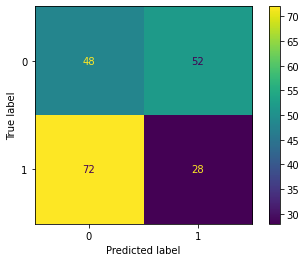

In [59]:
cm = confusion_matrix(y_test, yhat, labels=final_svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=final_svm.classes_)
disp.plot()

plt.show()

In [60]:
def model_LR(X,y):
    from sklearn.linear_model import LogisticRegression
    from sklearn.utils import shuffle
    from sklearn.model_selection import cross_val_score
    
    X_shuff,y_shuff = shuffle(X,y)
    model = LogisticRegression()
    cross = cross_val_score(model, X_shuff, y_shuff, cv=5, n_jobs=-1)

    model = LogisticRegression()
    model.fit(X_shuff, y_shuff)
    ans = model.predict(X_shuff)
    acc = sum(ans == y_shuff) / len(y_shuff)
    return model, acc, cross